# Import libraries

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import ttest_1samp
%matplotlib inline

# Read the CSV file and Preview the dataset

In [345]:
dataset = pd.read_csv("nba.csv")
dataset.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


# Convert Height column data into a number

In [346]:
dataset["Height"] = (dataset["Height"].astype(str)).str.split("-")
dataset["Height"] = (dataset["Height"].str.join(".")).astype(float)
dataset.dtypes #check if the data type has changed

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height      float64
Weight      float64
College      object
Salary      float64
dtype: object

# Summary Statistics

In [347]:
dataset.describe()

,Number,Age,Height,Weight,Salary
count,457.000000,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,6.517133,221.522976,4.842684e+06
std,15.966090,4.404016,0.352205,26.368343,5.229238e+06
min,0.000000,19.000000,5.110000,161.000000,3.088800e+04
25%,5.000000,24.000000,6.110000,200.000000,1.044792e+06
50%,13.000000,26.000000,6.600000,220.000000,2.839073e+06
75%,25.000000,30.000000,6.800000,240.000000,6.500000e+06
max,99.000000,40.000000,7.300000,307.000000,2.500000e+07


# Salary Range

In [348]:
Range = dataset.Salary.max() - dataset.Salary.min()
Range

24969112.0

# Salary Interquantile Range

In [349]:
Q1 = dataset.Salary.quantile(0.25)
Q3 = dataset.Salary.quantile(0.75)
IQR = Q3 - Q1
IQR

5455207.75

# Lower Bound and Upper Bound using 1.5*IQR Rule

In [350]:
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
lower_bound, upper_bound

(-7138019.375, 14682811.625)

# Dataframe with Outliers

In [351]:
outliers_df = dataset[(dataset["Salary"]<lower_bound) | (dataset["Salary"]>upper_bound)]
outliers_df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
23,Brook Lopez,Brooklyn Nets,11.0,C,28.0,7.00,275.0,Stanford,19689000.0
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6.80,240.0,Syracuse,22875000.0
89,Klay Thompson,Golden State Warriors,11.0,SG,26.0,6.70,215.0,Washington State,15501000.0
96,Blake Griffin,Los Angeles Clippers,32.0,PF,27.0,6.10,251.0,Oklahoma,18907726.0
98,DeAndre Jordan,Los Angeles Clippers,6.0,C,27.0,6.11,265.0,Texas A&M,19689000.0
100,Chris Paul,Los Angeles Clippers,3.0,PG,31.0,6.00,175.0,Wake Forest,21468695.0
109,Kobe Bryant,Los Angeles Lakers,24.0,SF,37.0,6.60,212.0,NaN,25000000.0
111,Roy Hibbert,Los Angeles Lakers,17.0,C,29.0,7.20,270.0,Georgetown,15592217.0
143,DeMarcus Cousins,Sacramento Kings,15.0,C,25.0,6.11,270.0,Kentucky,15851950.0
153,Jimmy Butler,Chicago Bulls,21.0,SG,26.0,6.70,220.0,Marquette,16407500.0


# Confidence Interval of Salary

In [352]:
data = dataset.Salary.dropna() #st.sem will not work with nun values
t_test = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(dataset.Salary), scale=st.sem(data))
norm_dist = st.norm.interval(alpha=0.95, loc=np.mean(dataset.Salary), scale=st.sem(data))
t_test,norm_dist

((4356050.792119013, 5329317.418643318),
 (4357374.332668734, 5327993.8780935975))

In [353]:
print("There is a 95% chance that the confidence interval of {} contains the true population mean height of plants".format(t_test))

There is a 95% chance that the confidence interval of (4356050.792119013, 5329317.418643318) contains the true population mean height of plants


In [354]:
#Another way of saying the same thing is that there is only a 5% chance that the true population mean 
#lies outside of the 95% confidence interval. That is, there’s only a 5% chance that the true population mean salary for player 
#is less than $4 356 050.79  or greater than $5 329 317.42

# Hypothesis test if the mean is $5 000 000

In [355]:
#https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
#more on hypothesis testing in Python

salary = dataset.Salary

salary_mean = np.mean(dataset.Salary)
print(salary_mean)

t_stat, pval = ttest_1samp(salary, popmean=5000000,nan_policy="omit") #null hypothesis is that the mean is 5 000 000
print("p-values",pval)
print("t-stat",t_stat)

if pval < 0.05:# alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

4842684.105381166
p-values 0.5255375764851901
t-stat -0.6353333581669195
we are accepting null hypothesis


In [356]:
print("We dont have enough evidence to reject the null hypothesis")

We dont have enough evidence to reject the null hypothesis


# Probality of a player playing position SG and he has high salary
Consider salaries greater than upper_bound

In [357]:
df_pos = dataset[["Position","Salary"]]
#df_pos.head()
df_pos['High_Salary'] = np.where(df_pos['Salary'] >= upper_bound, 1, 0)
df_pos

C:\Users\dakalo.nemauluma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Position,Salary,High_Salary
0,PG,7730337.0,0
1,SF,6796117.0,0
2,SG,NaN,0
3,SG,1148640.0,0
4,PF,5000000.0,0
...,...,...,...
453,PG,2433333.0,0
454,PG,900000.0,0
455,C,2900000.0,0
456,C,947276.0,0


Create a table with counts of every position

In [358]:
table = pd.crosstab(df_pos.Position,df_pos.High_Salary)
table

High_Salary,0,1
Position,,
C,70,8
PF,95,5
PG,86,6
SF,76,9
SG,95,7


Conditional probability calculations

In [359]:
#Probality of SG
P_sg = (95+7)/sum(table[0])

#Probability of high salary
P_hs = sum(table[1])/(sum(table[0]) + sum(table[1]))

#Probabilty of SG and high Salary
P_sg_hs = 7/(sum(table[0]) + sum(table[1]))

#Probality that a player plays position SG and has high salary
P = P_sg_hs/P_hs

P_sg, P_hs, P_sg_hs,P

(0.24170616113744076, 0.07658643326039387, 0.015317286652078774, 0.2)

# Show the distribution of Age

C:\Users\dakalo.nemauluma\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  tmp_a = tmp_a[keep]
C:\Users\dakalo.nemauluma\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  if tmp_w is not None:


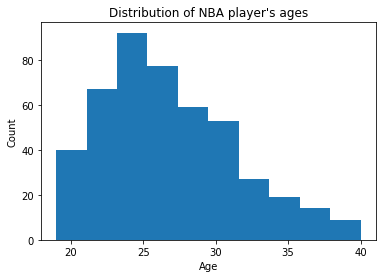

In [360]:
plt.hist(x="Age",data=dataset)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of NBA player's ages")
plt.show()

# Show correlation between all the features

In [361]:
dataset.corr()

,Number,Age,Height,Weight,Salary
Number,1.000000,0.028724,0.175314,0.206921,-0.112386
Age,0.028724,1.000000,-0.053471,0.087183,0.213459
Height,0.175314,-0.053471,1.000000,0.293000,-0.035906
Weight,0.206921,0.087183,0.293000,1.000000,0.138321
Salary,-0.112386,0.213459,-0.035906,0.138321,1.000000


# How many players are above average age and play center position

In [362]:
(dataset[(dataset["Age"]>=27) & (dataset["Position"]=="C")]).count() #return list of players who are >=27 and who play center 

Name        42
Team        42
Number      42
Position    42
Age         42
Height      42
Weight      42
College     23
Salary      42
dtype: int64

# Which player(s) get paid the least and most?

In [363]:
dataset[(dataset["Salary"] == max(dataset.Salary)) | (dataset["Salary"] == min(dataset.Salary))]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
32,Thanasis Antetokounmpo,New York Knicks,43.0,SF,23.0,6.7,205.0,NaN,30888.0
109,Kobe Bryant,Los Angeles Lakers,24.0,SF,37.0,6.6,212.0,NaN,25000000.0


# Which player(s) is youngest and oldest?

In [364]:
dataset[(dataset["Age"] == max(dataset.Age)) | (dataset["Age"] == min(dataset.Age))]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
122,Devin Booker,Phoenix Suns,1.0,SG,19.0,6.60,206.0,Kentucky,2127840.0
226,Rashad Vaughn,Milwaukee Bucks,20.0,SG,19.0,6.60,202.0,UNLV,1733040.0
298,Tim Duncan,San Antonio Spurs,21.0,C,40.0,6.11,250.0,Wake Forest,5250000.0
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6.30,200.0,Utah,250750.0
400,Kevin Garnett,Minnesota Timberwolves,21.0,PF,40.0,6.11,240.0,NaN,8500000.0


# On average which team pays their players the most

In [365]:
groupByTeam = dataset.groupby(["Team"])
groupByTeam.mean().sort_values(by=["Salary"],ascending=False)
#Answer is Cleaveland Cavaliers

,Number,Age,Height,Weight,Salary
Team,,,,,
Cleveland Cavaliers,14.466667,29.533333,6.508000,227.866667,7.642049e+06
Miami Heat,10.466667,28.933333,6.527333,218.400000,6.347359e+06
Los Angeles Clippers,19.533333,29.466667,6.468000,219.733333,6.323643e+06
Oklahoma City Thunder,14.000000,27.066667,6.434000,229.400000,6.251020e+06
Golden State Warriors,20.866667,27.666667,6.541333,224.600000,5.924600e+06
Chicago Bulls,19.200000,27.400000,6.508000,218.933333,5.785559e+06
San Antonio Spurs,17.933333,31.600000,6.528000,223.933333,5.629516e+06
Memphis Grizzlies,15.555556,28.388889,6.422222,218.000000,5.467920e+06
Charlotte Hornets,17.133333,26.133333,6.613333,220.400000,5.222728e+06


# On avarage which player position get paid the most?

In [366]:
groupByTeam = dataset.groupby(["Position"])
groupByTeam.mean().sort_values(by=["Salary"],ascending=False)
#Answer is Center

,Number,Age,Height,Weight,Salary
Position,,,,,
C,21.807692,27.371795,6.622051,254.205128,5.967052e+06
PG,10.967391,26.847826,6.219891,189.478261,5.077829e+06
SF,17.611765,26.858824,6.704824,221.776471,4.857393e+06
PF,23.570000,27.160000,6.511700,240.430000,4.562483e+06
SG,14.852941,26.539216,6.553922,206.686275,4.009861e+06


# Show number of players in a team per position

In [367]:
pd.crosstab(dataset.Team,dataset.Position)

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,3,4,2,2,4
Boston Celtics,3,3,4,1,4
Brooklyn Nets,2,4,3,0,6
Charlotte Hornets,3,3,3,1,5
Chicago Bulls,2,5,2,2,4
Cleveland Cavaliers,3,2,3,2,5
Dallas Mavericks,3,4,4,2,2
Denver Nuggets,3,2,3,3,4
Detroit Pistons,3,2,4,4,2
